<a href="https://colab.research.google.com/github/dinesh-2000/GRIP-TSF-Internship/blob/main/Task_3_EDA_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Sparks Foundation || GRIP_APRIL-21**


---



### **Data Science and Business Analytics**
**TASK 3 - Exploratory Data Analysis - Retail**

**Author : Dinesh Kumar C**

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?.






# **Importing libraries and Load The Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
SSData = pd.read_csv("/SampleSuperstore.csv")
print('import successfully')


import successfully


# **Data Inspection**

In [3]:
# Initial Shape of the Data Frame
SSData.shape

(9994, 13)

In [4]:
SSData

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
SSData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Statistics of Numerical valued colums
SSData.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Cleaning Data**

Deleting Identicle rows to reduce noise from the data

In [7]:
SSData.drop_duplicates(keep= 'first',inplace=True)

In [8]:
# Final Shape of the Data Frame
SSData.shape #17 indentical rows identified and removed

(9977, 13)

# **Exploratory Analysis :**

**Lets look at the product categories available in our data :**

In [9]:
SSData['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
# number of products in each category 
SSData['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

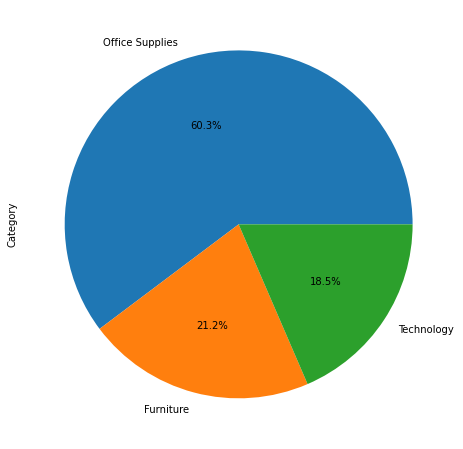

In [11]:
# plot of products in each category
plt.figure(figsize=(10,8))
SSData['Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [12]:
#number of products in each sub-category
SSData['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

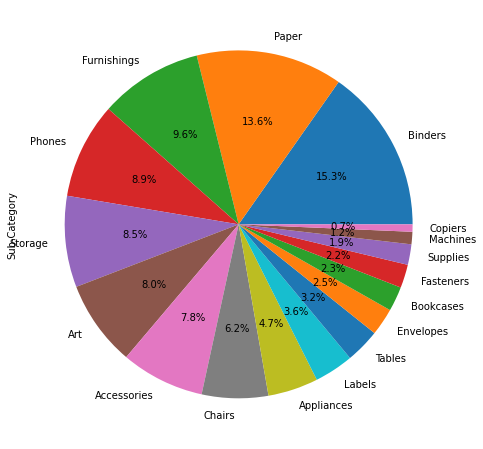

In [13]:
# plot of products in each sub-category
plt.figure(figsize=(10,8))
SSData['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


<Figure size 576x432 with 0 Axes>

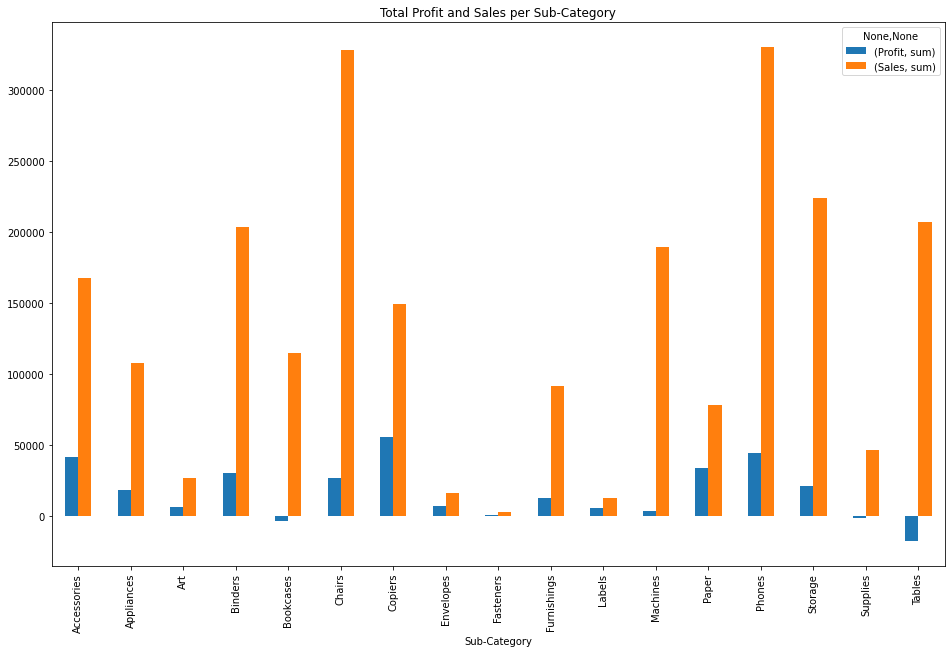

In [14]:
#Total Profit and Sales per Sub-Category 

plt.figure(figsize=(8,6))
SSData.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))
plt.title('Total Profit and Sales per Sub-Category')
plt.show();

**The weak areas where we can work to make more profit ?**

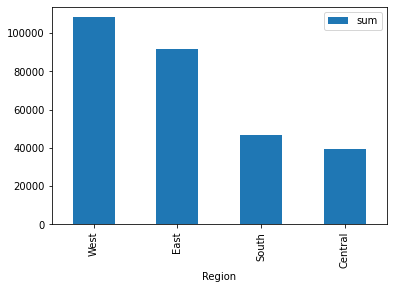

In [15]:
#Checking the Profit based on the Region
SSData.groupby('Region')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar()

**The Profit is maximum in the Western Region of the country and minimum in the Central Region of the country.**

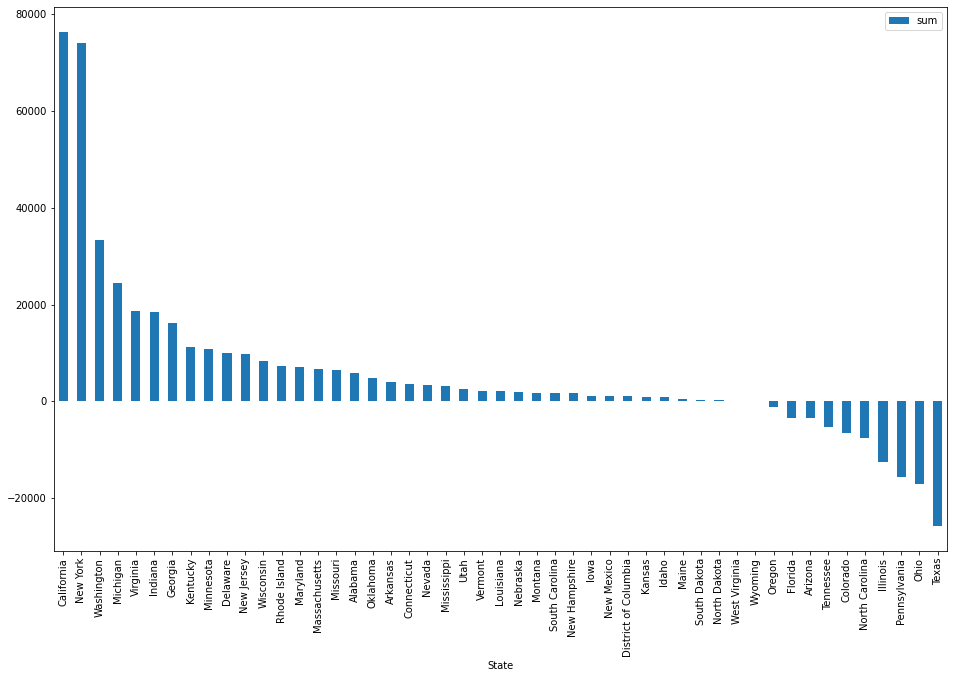

In [16]:
#now checking the Profit earned in each the State 
SSData.groupby('State')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar(figsize=(16,10));

**We can see that the maximum profits comes from the State of California followed by New York. And the minimum profits comes from the States of Texas followed by Ohio and Pensylvania.**

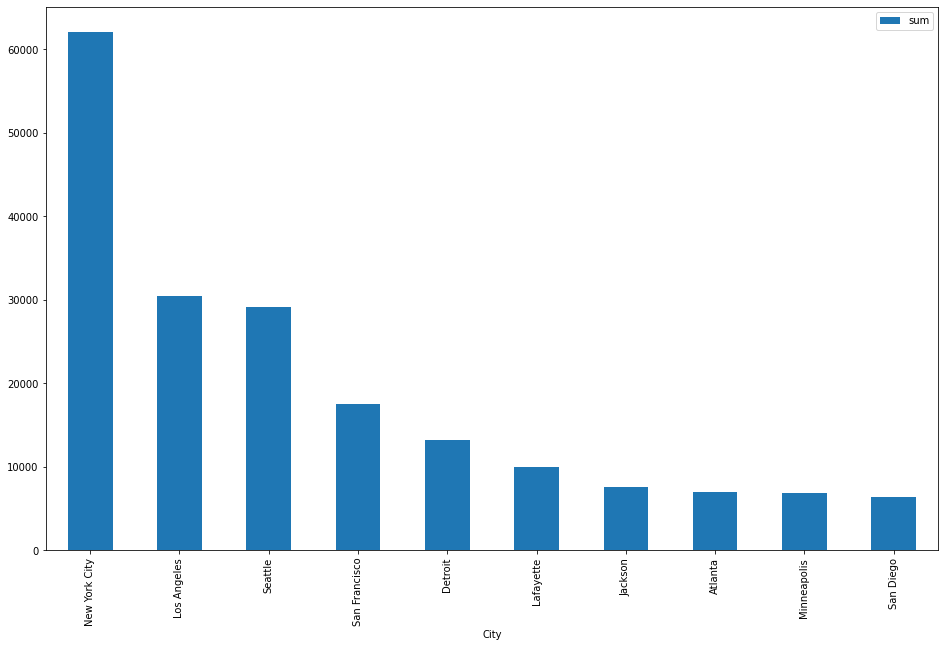

In [17]:
#Top 10 cities in US with high profits sum :

SSData.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False)[:10].plot.bar(figsize=(16,10));

**The maximum profits in all the Cities comes from the New York City followed by Los Angeles and Seattle**

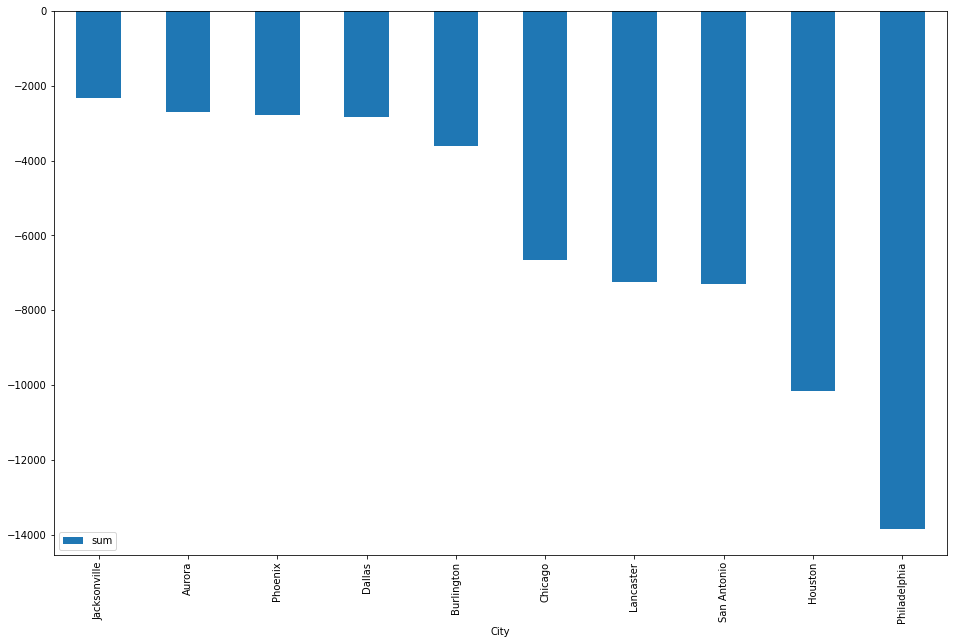

In [18]:
#Top 10 non profitable cities in US :

SSData.groupby('City')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False)[521:].plot.bar(figsize=(16,10));

**The minimum profits in all the Cities comes from Philadelphia followed by Houston City.**

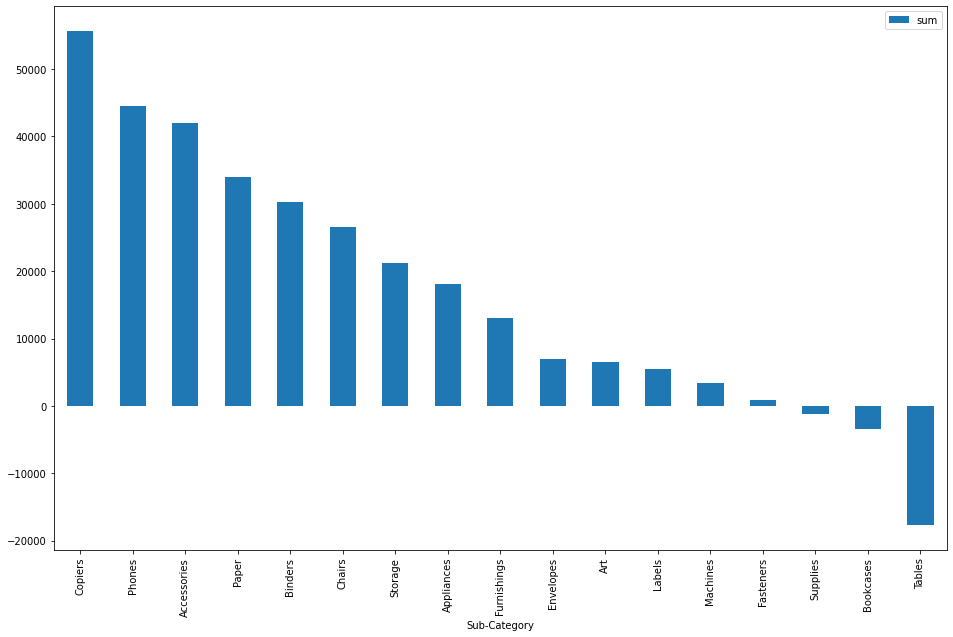

In [19]:
#Total Profit VS Sub Category
SSData.groupby('Sub-Category')['Profit'].agg(['sum']).sort_values(['sum'], 
                                                         ascending=False).plot.bar(figsize=(16,10));

**The maximum profit was earned by selling the copiers and the highest losses are incurred in selling the Tables, Bookcases and Supplies respectively.**

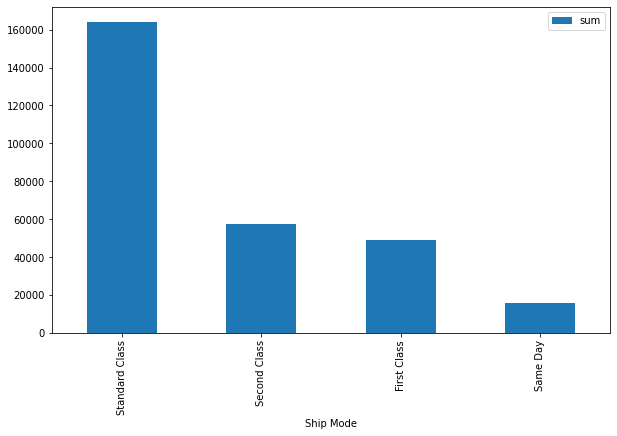

In [20]:
#Profit VS Shipping Mode

SSData.groupby('Ship Mode')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar(figsize=(10,6));

**This shows that the Standard Shipping is the most profitable Shipping Mode in all the Categories (>160 000).**

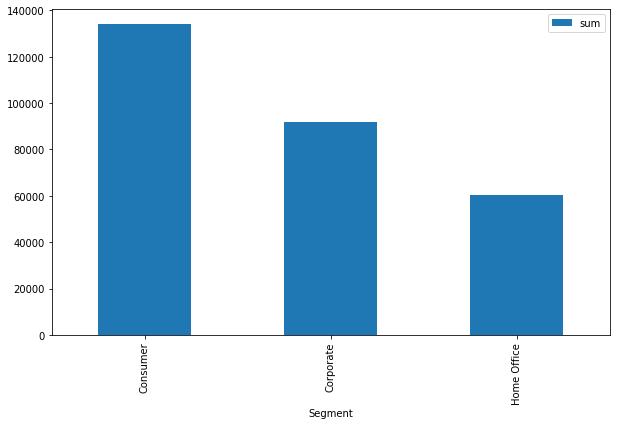

In [21]:
#Profit in Each Segment
SSData.groupby('Segment')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar(figsize=(10,6));

**The most profitable Segment is Consumers followed by Corporate and Home Office.**

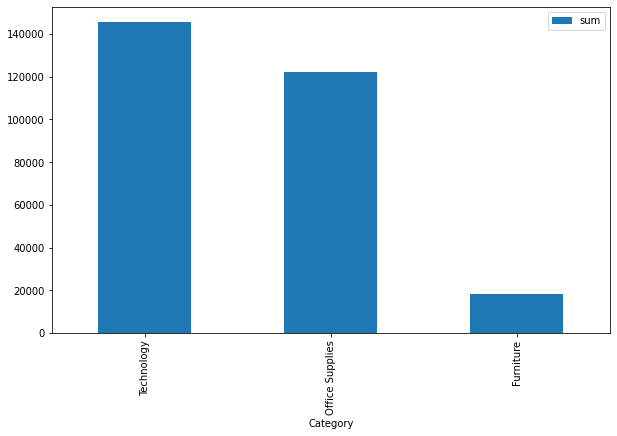

In [22]:
#Profit VS Category

SSData.groupby('Category')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar(figsize=(10,6));

**We can see that the Technology is the most profitable category, followed by Office Supplies and Furniture.**

# **Conclusion**
* For enhancing the profits , we need to sell more to the states which are liking our products like NEWYORK and CALIFORNIA .
* Sales in 'Fasteners','labels'and 'Art' category are so    weak.so we have to concentrate on these sub-category businesses.
* We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.



